In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
import datetime as dt

#### Import data

In [2]:
# Function to get mean returns and covariace matrix

def get_meanret_covmat(stocks, startdate, enddate):
    stock_data = pdr.get_data_yahoo(stocks, startdate, enddate)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    
    return mean_returns, cov_matrix
    

In [3]:
stocks = ["BNTX", "PINS", "NVS", "TSLA", "FCNCA", "AAPL", "GOOG", "META", "GE"]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

In [4]:
# testing function
mean_ret, cov_mat = get_meanret_covmat(stocks, start_date, end_date)
print(mean_ret, cov_mat)

[*********************100%***********************]  9 of 9 completed
AAPL     0.000942
BNTX    -0.000367
FCNCA    0.002519
GE       0.002585
GOOG    -0.000122
META     0.001494
NVS      0.000471
PINS     0.002428
TSLA    -0.000237
dtype: float64            AAPL      BNTX     FCNCA        GE      GOOG      META       NVS  \
AAPL   0.000428  0.000185  0.000180  0.000213  0.000389  0.000453  0.000076   
BNTX   0.000185  0.000931  0.000065  0.000155  0.000228  0.000338  0.000079   
FCNCA  0.000180  0.000065  0.001867  0.000225  0.000127  0.000274  0.000302   
GE     0.000213  0.000155  0.000225  0.000412  0.000210  0.000274  0.000077   
GOOG   0.000389  0.000228  0.000127  0.000210  0.000629  0.000645  0.000078   
META   0.000453  0.000338  0.000274  0.000274  0.000645  0.001466  0.000093   
NVS    0.000076  0.000079  0.000302  0.000077  0.000078  0.000093  0.000174   
PINS   0.000477  0.000363  0.000396  0.000302  0.000667  0.000882  0.000121   
TSLA   0.000475  0.000266  0.000342  0.0002

In [5]:
# Weights for portfolio
weights = np.random.random(len(mean_ret))
weights /= np.sum(weights)
print(weights)

[0.10115664 0.22642419 0.18757611 0.11900754 0.00341533 0.21769119
 0.07736644 0.03006298 0.03729957]


In [6]:
# Monte Carlo simulation

mc_sims = 100 # no of simulation
T = 100 # timeframe in days
meanM = np.full(shape = (T,len(weights)), fill_value = mean_ret)
meanM = meanM.T

portfolio_sims = np.full(shape =(T, mc_sims), fill_value = 0.0)
initial_portfolio = 10000

In [7]:
for m in range(mc_sims):
    z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(cov_mat)
    daily_returns = meanM + np.inner(L,z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T) + 1)*initial_portfolio
    

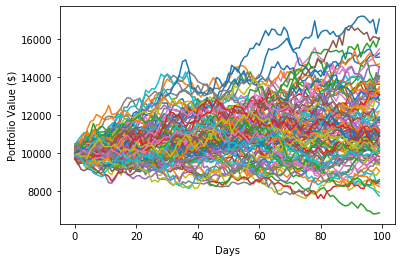

In [8]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.show()